In [1]:
import tensorflow as tf
import pathlib
import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, Rescaling
import matplotlib.pyplot as plt

In [2]:
# Import training and testing data
data_train = 'Convolutional Neural Network/data/train'
data_train = pathlib.Path(data_train)

data_val = 'Convolutional Neural Network/data/val'
data_val = pathlib.Path(data_val)

In [3]:
# Setting the data classes
CLASS_NAMES = np.array(['Cr','In','PS','Pa','Rs','Sc'])

# Setting the Image size and Batch size
BATCH_SIZE = 64
IMG_HEIGHT = 32
IMG_WIDTH = 32


In [4]:
from keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    'data/train',
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical',
    class_names = list(CLASS_NAMES)
)

validation_dataset = image_dataset_from_directory(
    'data/val',
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    label_mode = 'categorical',
    class_names = list(CLASS_NAMES)
)

Found 1440 files belonging to 6 classes.
Found 360 files belonging to 6 classes.


2025-11-08 08:10:52.227314: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-11-08 08:10:52.227373: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-11-08 08:10:52.227376: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-11-08 08:10:52.227547: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-08 08:10:52.227564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
from keras.models import Sequential
model = Sequential()
model.add(Input(shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Rescaling(1./255))

In [6]:
model.add(Conv2D(6, (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, (5,5), activation="relu"))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Conv2D(120, (5,5), activation="relu"))
model.add(Flatten())
model.add(Dense(84, activation = 'relu'))
model.add(Dense(6, activation='softmax'))

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=50, verbose=2)

Epoch 1/50


2025-11-08 08:10:52.930234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


23/23 - 2s - 90ms/step - accuracy: 0.2569 - loss: 1.7294 - val_accuracy: 0.3306 - val_loss: 1.6164
Epoch 2/50
23/23 - 0s - 22ms/step - accuracy: 0.3576 - loss: 1.4566 - val_accuracy: 0.4028 - val_loss: 1.3605
Epoch 3/50
23/23 - 0s - 21ms/step - accuracy: 0.4278 - loss: 1.2864 - val_accuracy: 0.4917 - val_loss: 1.1478
Epoch 4/50
23/23 - 0s - 21ms/step - accuracy: 0.5437 - loss: 1.0963 - val_accuracy: 0.4944 - val_loss: 1.1934
Epoch 5/50
23/23 - 0s - 21ms/step - accuracy: 0.4938 - loss: 1.1531 - val_accuracy: 0.6139 - val_loss: 1.1534
Epoch 6/50
23/23 - 0s - 21ms/step - accuracy: 0.6007 - loss: 1.0213 - val_accuracy: 0.5444 - val_loss: 1.1653
Epoch 7/50
23/23 - 0s - 21ms/step - accuracy: 0.6187 - loss: 1.0111 - val_accuracy: 0.6500 - val_loss: 0.9967
Epoch 8/50
23/23 - 0s - 20ms/step - accuracy: 0.6056 - loss: 1.0049 - val_accuracy: 0.6667 - val_loss: 0.9756
Epoch 9/50
23/23 - 0s - 19ms/step - accuracy: 0.6854 - loss: 0.9091 - val_accuracy: 0.6972 - val_loss: 0.9867
Epoch 10/50
23/23 - 0

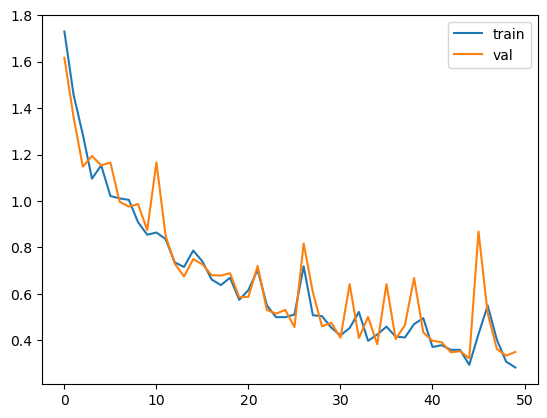

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()
plt.show()

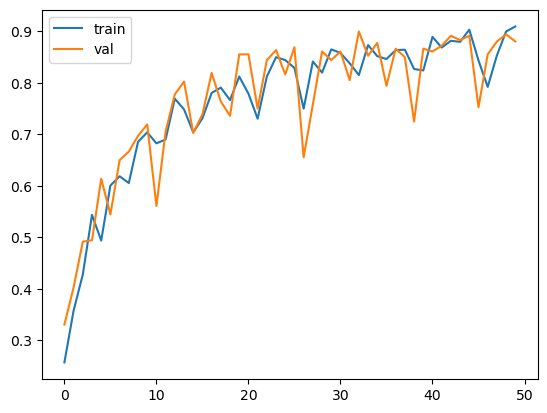

In [9]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.legend()
plt.show()

In [10]:
pre_y = model.predict(validation_dataset)
display(pre_y)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[2.0804052e-08, 3.2820499e-05, 9.9981874e-01, 2.1004253e-15,
        8.8279725e-05, 6.0190978e-05],
       [8.9895966e-09, 3.5423249e-18, 6.8412853e-09, 1.4219359e-02,
        2.2846207e-14, 9.8578066e-01],
       [2.9505601e-02, 2.6607420e-02, 1.7260985e-02, 1.0406032e-05,
        9.0895438e-01, 1.7661236e-02],
       ...,
       [8.9798756e-03, 8.5792087e-02, 4.7894225e-02, 1.9722743e-06,
        8.0249846e-01, 5.4833271e-02],
       [7.1673953e-06, 8.5589856e-01, 5.1484670e-02, 3.8099376e-10,
        1.1267372e-02, 8.1342198e-02],
       [8.6210785e-06, 9.1253614e-01, 8.8817272e-03, 1.6575272e-09,
        7.0007285e-03, 7.1572766e-02]], dtype=float32)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,000 (722.66 KB)

 Trainable params: 61,666 (240.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,334 (481.78 KB)

In [16]:
import cv2
src = cv2.imread("data/val/Pa/Pa_2.bmp")
src = cv2.resize(src, (32, 32))
src = src.astype("int32")

test_img = tf.expand_dims(src, 0)

pred = model.predict(test_img)
print(pred)
print(f"The predict model: {CLASS_NAMES[np.argmax(pred[0])]}, Possibilty: {np.max(pred[0]):.10f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[7.3020447e-17 0.0000000e+00 1.3432332e-20 1.0000000e+00 1.7711253e-34
  8.8972352e-13]]
The predict model: Pa, Possibilty: 1.0000000000
